### 📘 Restaurant Chains Data Analysis — Practice Notebook
**This notebook contains hands-on exercises to analyze restaurant chains using Python, Pandas, Seaborn, and Matplotlib.**

### 📂 Dataset Assumption:
The dataset contains the following columns:
- `restaurant_name`
- `location`
- `votes`
- `aggregate_rating`
- `cuisines`
- `cost_for_two`

---

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


1. **Load the dataset** using Pandas and display the first 5 rows.

In [2]:
df=pd.read_csv('restaurant_chains.csv')
df.head()

,restaurant_name,location,votes,aggregate_rating,cuisines,cost_for_two
0,Food junction,Chicago,90,1.082604,Italian,26
1,Bikir,Houston,24,4.033515,Indian,12
2,Homesicks,Chicago,54,2.280069,Japanese,18
3,Homesicks,Los Angeles,52,2.533856,Chinese,20
4,Homesicks,Chicago,47,3.353268,Chinese,36


2. How many **unique restaurants** are present in the dataset?

In [3]:
unique_restaurant=df["restaurant_name"].nunique()
print("NO. OF UNIQUE RESTAURANTS:",unique_restaurant)

NO. OF UNIQUE RESTAURANTS: 5


3. Find the **top 10 most frequently occurring** restaurant names.

In [4]:
top10_restaurants=df["restaurant_name"].value_counts().head(10)
print("TOP 10 RESTAURANTAS:",top10_restaurants)

TOP 10 RESTAURANTAS: restaurant_name
Bikir            22
Homesicks        22
Sunform          20
Food junction    19
Foodievibes      17
Name: count, dtype: int64


4. How many restaurants have a rating **greater than 4.0**?

In [5]:
rating_more_4=df[df["aggregate_rating"]>4.0]
no_rating_more_4=rating_more_4.shape[0]
print("No. of restaurants having more than 4.0 ratings:",no_rating_more_4)

No. of restaurants having more than 4.0 ratings: 29


5. Display the count of restaurants by **location** using a bar chart.

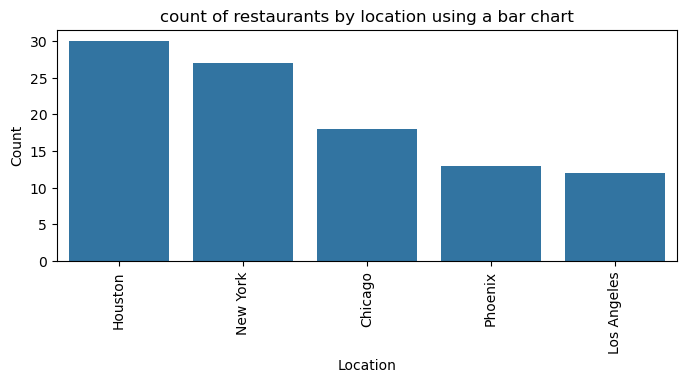

In [8]:
loc_count=df["location"].value_counts()
plt.figure(figsize=(8,3))
sns.barplot(x=loc_count.index,y=loc_count.values)
plt.title("count of restaurants by location using a bar chart")
plt.xlabel("Location")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

6. Identify restaurant **chains** (names that appear more than 3 times).

In [13]:
restaurant_counts = df['restaurant_name'].value_counts()
restaurant_chains = restaurant_counts[restaurant_counts > 3]
print("Restaurant chains (names that appear more than 3 times)\n",restaurant_chains)

Restaurant chains (names that appear more than 3 times)
 restaurant_name
Bikir            22
Homesicks        22
Sunform          20
Food junction    19
Foodievibes      17
Name: count, dtype: int64


7. Create a new DataFrame of only **chain restaurants**.

In [15]:
chain_restaurants = restaurant_counts[restaurant_counts > 3].index
chain_df = df[df['restaurant_name'].isin(chain_restaurants)].copy()
print(chain_df.head())
print(chain_df.shape)

  restaurant_name     location  votes  aggregate_rating  cuisines  \
0   Food junction      Chicago     90          1.082604   Italian   
1           Bikir      Houston     24          4.033515    Indian   
2       Homesicks      Chicago     54          2.280069  Japanese   
3       Homesicks  Los Angeles     52          2.533856   Chinese   
4       Homesicks      Chicago     47          3.353268   Chinese   

   cost_for_two  
0            26  
1            12  
2            18  
3            20  
4            36  
(100, 6)


8. For each chain, calculate the **average aggregate rating**.

In [16]:
# Calculate the average aggregate rating for each chain
average_ratings = chain_df.groupby('restaurant_name')['aggregate_rating'].mean().reset_index()

# Sort the results by average rating in descending order
average_ratings = average_ratings.sort_values(by='aggregate_rating', ascending=False)

print(average_ratings)

  restaurant_name  aggregate_rating
0           Bikir          3.467469
3       Homesicks          3.295201
4         Sunform          2.752999
1   Food junction          2.619317
2     Foodievibes          2.576065


9. For each chain, calculate the **total number of votes** received.

In [18]:
chain_df = df[df['restaurant_name'].isin(chain_restaurants)].copy()

# Calculate the total number of votes for each chain
total_votes = chain_df.groupby('restaurant_name')['votes'].sum().reset_index()

# Sort the results by total votes in descending order
total_votes = total_votes.sort_values(by='votes', ascending=False)

print(total_votes)

  restaurant_name  votes
3       Homesicks   1152
0           Bikir   1013
1   Food junction   1000
2     Foodievibes    943
4         Sunform    797


10. Visualize the **top 5 chains** with the highest average rating using a **Seaborn bar plot**.

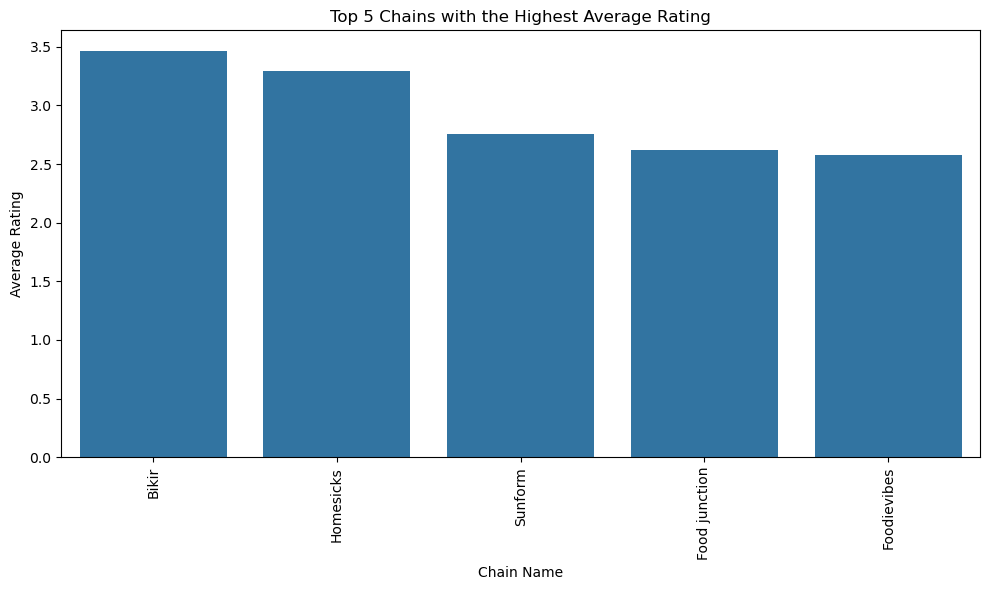

In [20]:
# Sort the results by average rating in descending order and get the top 5
top_5_chains = average_ratings.sort_values(by='aggregate_rating', ascending=False).head(5)

# Create a Seaborn bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='restaurant_name', y='aggregate_rating', data=top_5_chains)
plt.title('Top 5 Chains with the Highest Average Rating')
plt.xlabel('Chain Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


11. Compare the **popularity (votes)** of top 5 chains **across locations** using a grouped bar chart.

restaurant_name
Bikir            0
Food junction    0
Foodievibes      1
Homesicks        0
Sunform          0
dtype: int64
restaurant_name
Bikir            float64
Food junction    float64
Foodievibes      float64
Homesicks        float64
Sunform          float64
dtype: object


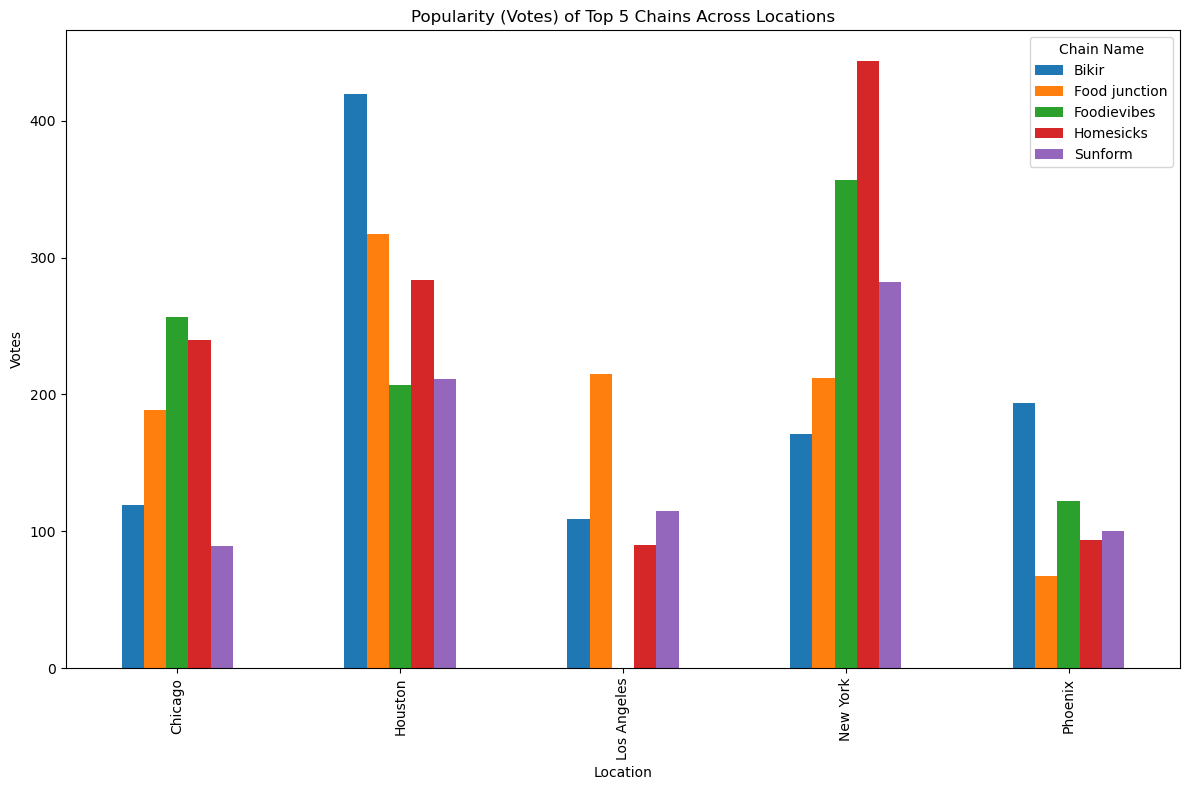

In [29]:
top_5_chains = chain_df.groupby('restaurant_name')['aggregate_rating'].mean().sort_values(ascending=False).head(5).index

# Filter the DataFrame to include only the top 5 chains
top_5_chain_df = chain_df[chain_df['restaurant_name'].isin(top_5_chains)]

# Group by location and chain, and calculate the sum of votes
votes_by_location = top_5_chain_df.groupby(['location', 'restaurant_name'])['votes'].sum().unstack('restaurant_name')

# Check if votes_by_location contains any NaN values
print(votes_by_location.isnull().sum())

# Fill NaN values with 0
votes_by_location = votes_by_location.fillna(0)

# Check the data type of the values in votes_by_location
print(votes_by_location.dtypes)

# Ensure the values are numeric
votes_by_location = votes_by_location.apply(pd.to_numeric, errors='coerce')

# Create a grouped bar chart
votes_by_location.plot(kind='bar', figsize=(12, 8))
plt.title('Popularity (Votes) of Top 5 Chains Across Locations')
plt.xlabel('Location')
plt.ylabel('Votes')
plt.legend(title='Chain Name')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


12. Plot a **boxplot** showing the distribution of ratings for the top 5 chains.

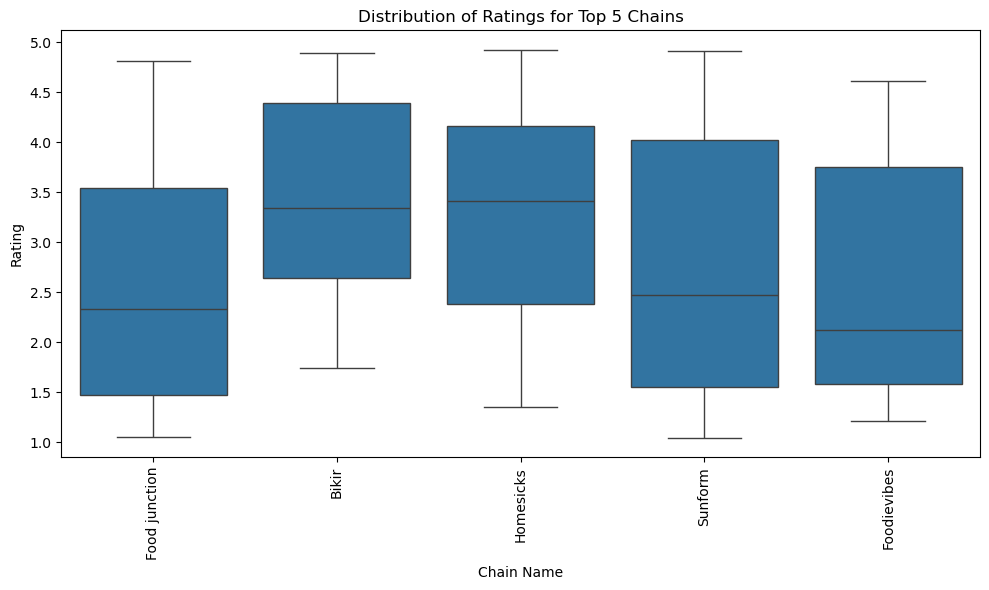

In [30]:
chain_df = df[df['restaurant_name'].isin(chain_restaurants)].copy()

# Get the top 5 chains by average rating
top_5_chains = chain_df.groupby('restaurant_name')['aggregate_rating'].mean().sort_values(ascending=False).head(5).index

# Filter the DataFrame to include only the top 5 chains
top_5_chain_df = chain_df[chain_df['restaurant_name'].isin(top_5_chains)]

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='restaurant_name', y='aggregate_rating', data=top_5_chain_df)
plt.title('Distribution of Ratings for Top 5 Chains')
plt.xlabel('Chain Name')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


13. Which locations have the **highest number of high-rated chain restaurants** (rating > 4.2)?

In [32]:
# Filter high-rated chain restaurants
high_rated_chain_df = chain_df[chain_df['aggregate_rating'] > 4.2]

# Group by location and count the number of high-rated chain restaurants
high_rated_chain_counts = high_rated_chain_df['location'].value_counts()

# Get the top locations
top_locations = high_rated_chain_counts.head(10)

print(top_locations)


location
New York       7
Los Angeles    5
Houston        4
Chicago        3
Phoenix        3
Name: count, dtype: int64


14. Find the **average cost** for two for each chain. Sort in descending order.

In [38]:
# Create a new DataFrame of only chain restaurants
chain_df = df[df['restaurant_name'].isin(chain_restaurants)].copy()

# Calculate the average cost for two for each chain
avg_cost_for_two = chain_df.groupby('restaurant_name')['cost_for_two'].mean().sort_values(ascending=False)

print(avg_cost_for_two)

restaurant_name
Food junction    30.210526
Homesicks        28.818182
Bikir            28.045455
Sunform          24.700000
Foodievibes      22.470588
Name: cost_for_two, dtype: float64


15. Create a final summary table of top 5 chains including:
   - Number of outlets
   - Average rating
   - Total votes
   - Average cost for two

In [47]:
summary_table = chain_df.groupby('restaurant_name').agg(
    Number_of_Outlets=('restaurant_name', 'count'),
    Average_Rating=('aggregate_rating', 'mean'),
    Total_Votes=('votes', 'sum'),
    avg_cost_for_two=('cost_for_two', 'mean')
).reset_index()
summary_table.columns = ['Chain Name', 'Number of Outlets', 'Average Rating', 'Total Votes', 'Average Cost for Two']

top_5_chains = summary_table.sort_values(by='Average Rating', ascending=False).head(5)
print(top_5_chains)


      Chain Name  Number of Outlets  Average Rating  Total Votes  \
0          Bikir                 22        3.467469         1013   
3      Homesicks                 22        3.295201         1152   
4        Sunform                 20        2.752999          797   
1  Food junction                 19        2.619317         1000   
2    Foodievibes                 17        2.576065          943   

   Average Cost for Two  
0             28.045455  
3             28.818182  
4             24.700000  
1             30.210526  
2             22.470588  
